## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
orig_no_mice = len(pd.unique(combined_mouse_df['Mouse ID']))
orig_no_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count_series = combined_mouse_df.groupby(['Mouse ID','Timepoint']).size()
count_df = count_series.to_frame(name = 'size').reset_index()
sorted_count_df = count_df.sort_values('size', ascending=False)
dupicates_count_mouse_df = sorted_count_df.loc[sorted_count_df['size'] > 1]
dupicates_count_mouse_df

,Mouse ID,Timepoint,size
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_combined_mouse_df = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] == 'g989']
duplicates_combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID'] != 'g989']
cleaned_combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
no_mice = len(pd.unique(cleaned_combined_mouse_df['Mouse ID']))
no_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting tregimen_grouped = cleaned_combined_mouse_df.groupby(["Drug Regimen"])

grouped_mouse_data = cleaned_combined_mouse_df.groupby('Drug Regimen')
tumor_volume_mean = grouped_mouse_data['Tumor Volume (mm3)'].mean()
tumor_volume_median = grouped_mouse_data['Tumor Volume (mm3)'].median()
tumor_volume_variance = grouped_mouse_data['Tumor Volume (mm3)'].var()
tumor_volume_std = grouped_mouse_data['Tumor Volume (mm3)'].std()
tumor_volume_sem = grouped_mouse_data['Tumor Volume (mm3)'].sem()
# tumor_volume_mean.head()
# print(type(tumor_volume_mean))
    #tumor_volume_df = pd.DataFrame({"Mean":[tumor_volume_mean]})
#tumor_volume_df

# Create a dataframe with all of our summary information
summary_statistics_df = pd.DataFrame({"Mean":tumor_volume_mean,
                                "Median":tumor_volume_median,
                                "Variance":tumor_volume_variance,
                                "Standard Deviation":tumor_volume_std,
                                "Standard Error of Measurement":tumor_volume_sem
                                 })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_statistics_df = cleaned_combined_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean', 'mean'),
                                                                                                     ("Median",'median'),
                                                                                                     ("Variance",'var'),
                                                                                                     ("Standard Deviation",'sem'),
                                                                                                     ("Standard Error of Measurement",'sem')
                                                                                                    ])
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111,0.573111


## Bar and Pie Charts

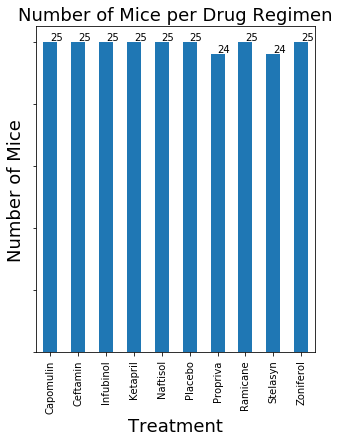

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']

no_mice_bar = no_mice_data.plot(kind='bar',figsize=(5,6))
no_mice_bar.set_title("Number of Mice per Drug Regimen", fontsize=18)
no_mice_bar.set_xlabel("Treatment", fontsize=18)
no_mice_bar.set_ylabel("Number of Mice", fontsize=18);
no_mice_bar.set_yticklabels([])

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    no_mice_bar.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')




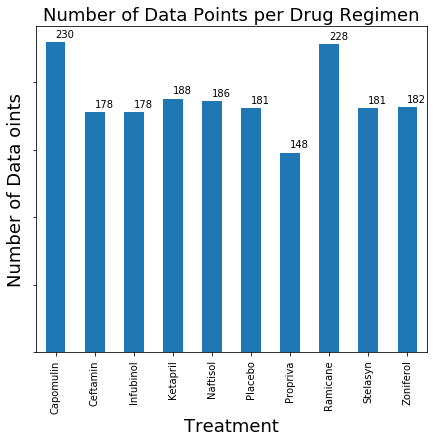

In [50]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

no_mice_bar = no_mice_data.plot(kind='bar',figsize=(7,6))
no_mice_bar.set_title("Number of Data Points per Drug Regimen", fontsize=18)
no_mice_bar.set_xlabel("Treatment", fontsize=18)
no_mice_bar.set_ylabel("Number of Data oints", fontsize=18);
no_mice_bar.set_yticklabels([])

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    no_mice_bar.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')




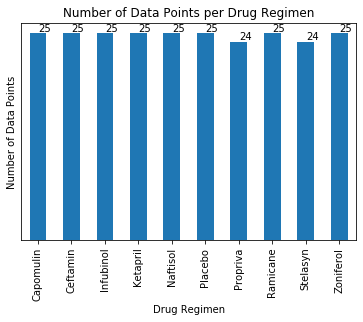

In [56]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']
plt.xdata = no_mice_data.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.yticks([])
plt.title('Number of Data Points per Drug Regimen')

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    plt.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')
plt.show()




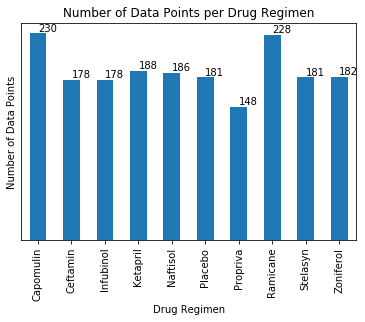

In [54]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

plt.xdata = no_mice_data.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.yticks([])
plt.title('Number of Data Points per Drug Regimen')

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    plt.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
